In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import joblib
import os
df=pd.read_excel(os.getcwd()+'/lecturas_cacao.xlsx')
x=df.drop('Aroma',axis=1)
y=df['Aroma']
# 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Modelo base
modelo_base = DecisionTreeClassifier(random_state=42)

# Definir hiperparámetros para el tuneo
parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearch para encontrar los mejores parámetros
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=parametros,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(" Buscando mejores hiperparámetros...")
grid_search.fit(X_train, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
mejor_modelo = grid_search.best_estimator_

🔍 Buscando mejores hiperparámetros...
Fitting 5 folds for each of 720 candidates, totalling 3600 fits

✅ Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
mejor_modelo.score(x, y)

1.0

In [23]:
y_pred = mejor_modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo:", round(accuracy, 4))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Exactitud del modelo: 1.0

Matriz de confusión:
[[2 0 0]
 [0 2 0]
 [0 0 2]]

Reporte de clasificación:
                precision    recall  f1-score   support

    desgranado       1.00      1.00      1.00         2
  fermentacion       1.00      1.00      1.00         2
fermentacion 2       1.00      1.00      1.00         2

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



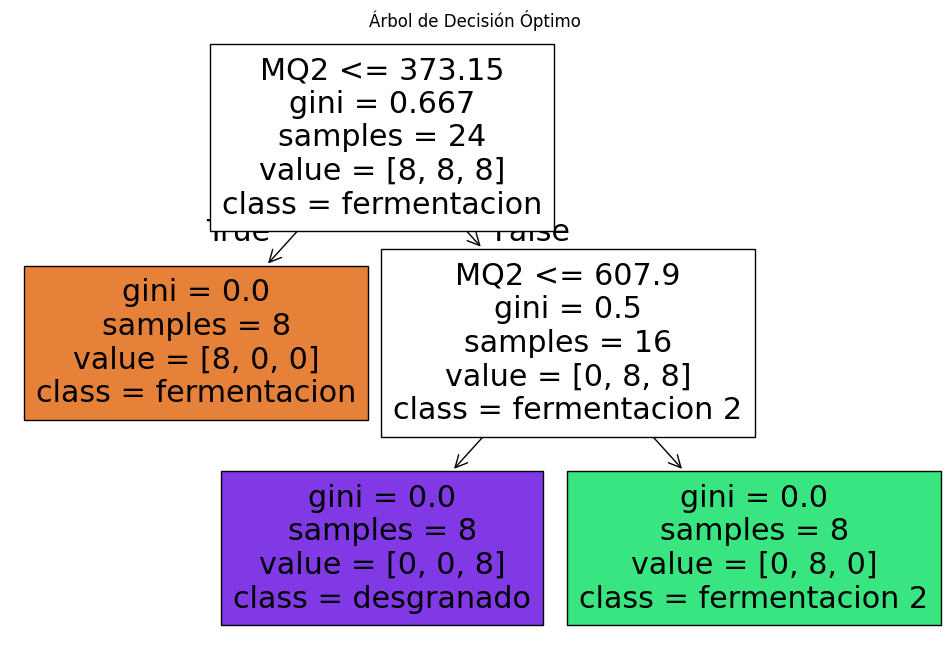

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(mejor_modelo, feature_names=x.columns, class_names=y.unique(), filled=True)
plt.title("Árbol de Decisión Óptimo")
plt.show()

In [25]:
nuevo_dato = pd.DataFrame([{
    "MQ1N": 0.99,
    "MQ2N": 1.63,
    "MQ3N": 4.18,
    "MQ1": 19.70,
    "MQ2": 500.27,
    "MQ3": 408.40
}])

prediccion = mejor_modelo.predict(nuevo_dato)

print("Aroma Predicho:", prediccion[0])


Aroma Predicho: fermentacion 2


In [26]:
joblib.dump(mejor_modelo, "modelo_dt.pkl")  # archivo .pkl

# Cargar el modelo
modelo_cargado = joblib.load("modelo_dt.pkl")

In [27]:
mejor_modelo.classes_

array(['desgranado', 'fermentacion', 'fermentacion 2'], dtype=object)

In [6]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
